# Discovering Top-K Periodic Frequent patterns in Big Data Using k-PFPMiner Algorithm

In this tutorial, we will discuss the first approach to find Top-K Periodic Frequent patterns in big data using kPFPMiner algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Top-K Periodic Frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing  kPFPMiner on a single dataset at a particular k value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the kPFPMiner algorithm

In [1]:
from PAMI.periodicFrequentPattern.topk.kPFPMiner import kPFPMiner as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'

k = 100  #Users can also specify this constraint between 0 to 1.
seperator = '\t'       

#### Step 3: Execute the PFECLAT algorithm

In [3]:
obj = alg.kPFPMiner(iFile=inputFile, k=k, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

kPFPMiner has successfully generated top-k frequent patterns


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='topKperiodicFrequentPatterns100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
periodicFrequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(periodicFrequentPatternsDF)))

Total No of patterns: 100


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 2.3006834983825684


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 222756864
Memory (USS): 184029184


# Advanced Tutorial on Implementing kPFPMiner Algorithm

In this tutorial, we will discuss the second approach to find top-k Periodic Frequent patterns in big data using kPFPMiner algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover top-k Periodic Frequent patterns using multiple k values.

***

#### In this tutorial, we explain how the ToP-K Periodic Frequent Miner (kPFPMiner) algorithm  can be implemented by varying the k values

#### Step 1: Import the kPFPMiner algorithm and pandas data frame

In [1]:
from PAMI.periodicFrequentPattern.topk.kPFPMiner import kPFPMiner as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
seperator = '\t'
k = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PFECLAT algorithm

#### Step 3: Execute the kPFPMiner algorithm using a for loop

In [12]:
algorithm = 'kPFPMiner'  #specify the algorithm name
for i in k:
    obj = alg.kPFPMiner('https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv', k=i, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, i, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


kPFPMiner has successfully generated top-k frequent patterns
kPFPMiner has successfully generated top-k frequent patterns
kPFPMiner has successfully generated top-k frequent patterns
kPFPMiner has successfully generated top-k frequent patterns
kPFPMiner has successfully generated top-k frequent patterns
kPFPMiner has successfully generated top-k frequent patterns
kPFPMiner has successfully generated top-k frequent patterns


In [13]:
print(result)

   algorithm  minSup  patterns   runtime     memory
0  kPFPMiner     100       100  2.292819  223555584
1  kPFPMiner     150       150  3.309900  224206848
2  kPFPMiner     200       200  4.534449  224604160
3  kPFPMiner     250       250  5.890688  224501760
4  kPFPMiner     300       300  7.441525  224501760
   algorithm  minSup  patterns    runtime    memory
0  kPFPMiner     100       100  13.001844  35487744
1  kPFPMiner     150       150  19.796862  33308672
2  kPFPMiner     200       200  28.779763  34848768
3  kPFPMiner     250       250  52.585916  33996800
4  kPFPMiner     300       300  49.133074  32686080


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [14]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

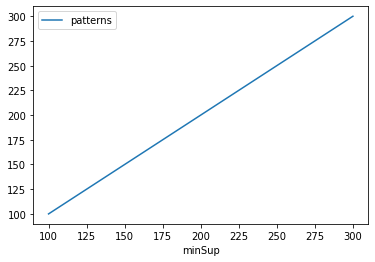

Graph for No Of Patterns is successfully generated!


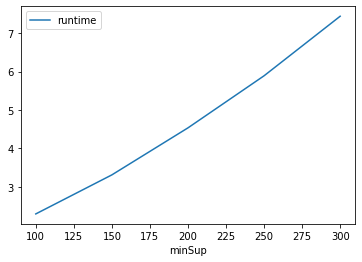

Graph for Runtime taken is successfully generated!


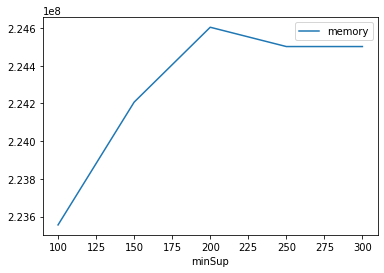

Graph for memory consumption is successfully generated!


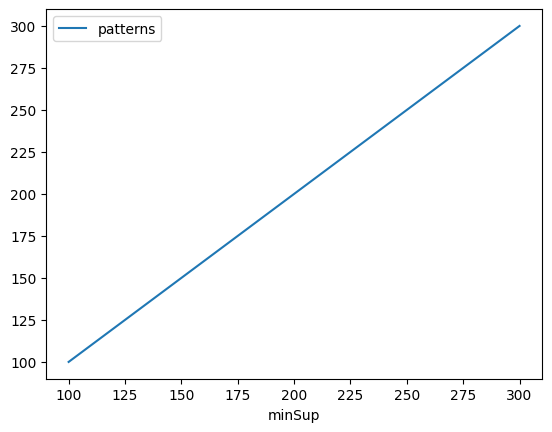

Graph for No Of Patterns is successfully generated!


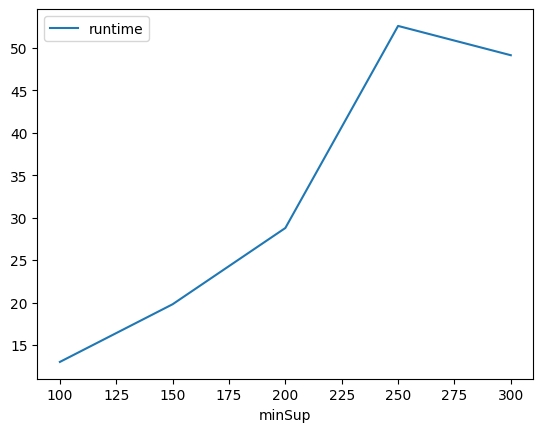

Graph for Runtime taken is successfully generated!


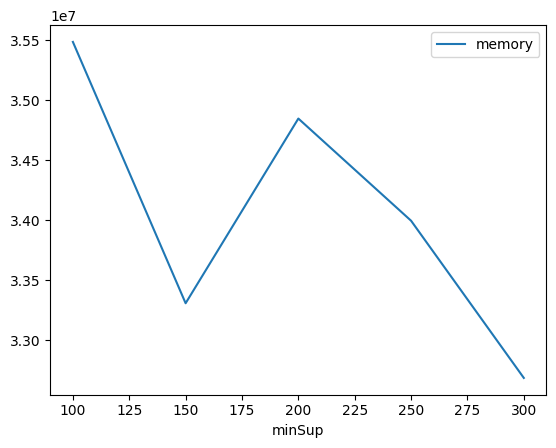

Graph for memory consumption is successfully generated!


In [15]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [16]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
Latex files generated successfully
